In [1]:
import numpy as np
from math import log2
import matplotlib.pyplot as plt

In [2]:
t = 10000

## With Equal Probability

In [3]:
node_degrees = {0: 2}

for i in range(len(node_degrees), t): 
    node_degrees[i] = 1
    
    edge_added = False
    while not edge_added:
        target_node_key = np.random.randint(0, len(node_degrees))

        if target_node_key in node_degrees and (target_node_key != i):
            node_degrees[target_node_key] += 1
            edge_added = True

In [4]:
unique_degrees = list(set(node_degrees.values()))
unique_degrees.sort()

degree_counts = []

for d in unique_degrees:
    val = list(node_degrees.values()).count(d)
    degree_counts.append(val)

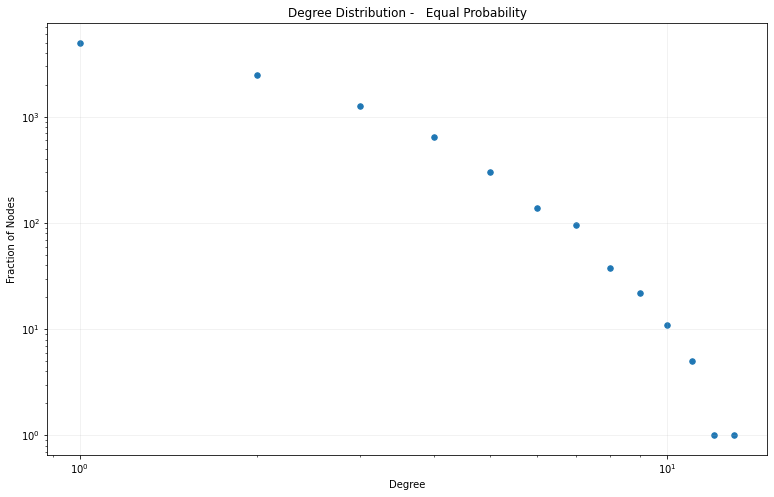

In [5]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])

ax.scatter(unique_degrees, degree_counts, s=30)

ax.set(xlabel="Degree", ylabel="Fraction of Nodes", title="Degree Distribution -   Equal Probability")
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(alpha = 0.2)

In [6]:
fig.savefig("Equal_Probability.png", 
            dpi=100, 
            bbox_inches ="tight",
            pad_inches = 0.5,
            facecolor ="w")

### Entropy

In [7]:
total_degree_counts = sum(degree_counts)

In [8]:
deg_count_prob = []

for deg_count in degree_counts:
    deg_count_prob.append(deg_count / total_degree_counts)

In [9]:
entropy = -sum([p * log2(p) for p in deg_count_prob])

In [10]:
entropy

1.9991913270754946

In [11]:
from scipy.stats import entropy

In [13]:
entropy(deg_count_prob, base=2)

1.9991913270754946

## With Preferential Attachment

In [14]:
node_degrees = {0: 2}

for i in range(len(node_degrees), t + 1): 
    node_degrees[i] = 1
    total_degrees = sum(node_degrees.values())
    
    node_probs = {} 
    for k in node_degrees.keys():
        node_probs[k] = float(node_degrees[k]) / total_degrees
        
    node_cum_probs = {}
    cum_prob = 0
    for k, v in node_probs.items():
        cum_prob += v
        node_cum_probs[k] = cum_prob
    
    edge_added = False
    while not edge_added:
        rnd_val = np.random.rand()
        last_cum_prob = 0
        node_key = ""

        for k, v in node_cum_probs.items():
            if (not(rnd_val > last_cum_prob and rnd_val <= v)) and (k != i):
                last_cum_prob = v
                node_key = k

        if node_key in node_degrees:
            node_degrees[node_key] += 1
            edge_added = True

In [15]:
unique_degrees = list(set(node_degrees.values()))

In [16]:
unique_degrees.sort()

In [17]:
degree_counts = []

for d in unique_degrees:
    val = list(node_degrees.values()).count(d)
    degree_counts.append(val)

In [18]:
# degree_counts

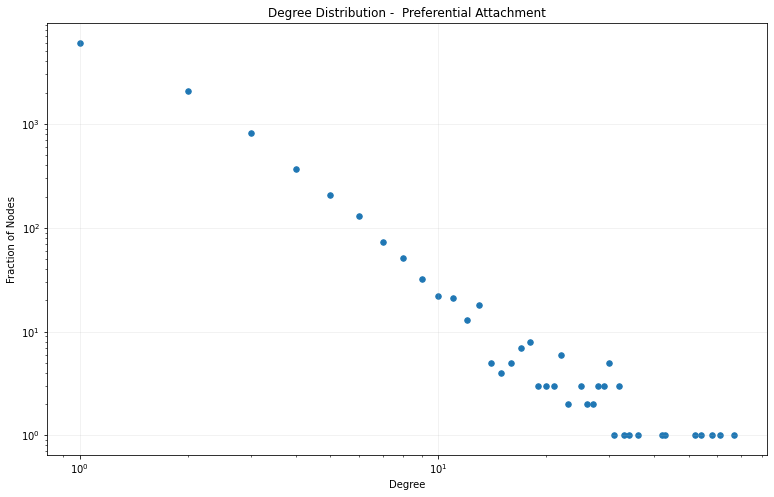

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])

ax.scatter(unique_degrees, degree_counts, s=30)

ax.set(xlabel="Degree", ylabel="Fraction of Nodes", title="Degree Distribution -  Preferential Attachment")
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(alpha = 0.2)

In [20]:
fig.savefig("Preferential_Attachment.png", 
            dpi=100, 
            bbox_inches ="tight",
            pad_inches = 0.5,
            facecolor ="w")

### Entropy

In [21]:
total_degree_counts = sum(degree_counts)

In [22]:
deg_count_prob = []

for deg_count in degree_counts:
    deg_count_prob.append(deg_count / total_degree_counts)

In [23]:
entropy = -sum([p * log2(p) for p in deg_count_prob])

In [24]:
entropy

1.851944769471155

In [25]:
from scipy.stats import entropy

In [26]:
entropy(deg_count_prob, base=2)

1.8519447694711544